In [1]:
##### Resistivity inversion and converted to the water content #####

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable


# For Jupyter notebooks, use the current working directory
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()
# Add the parent directory (OPEN_ERT) to the path
parent_dir = os.path.dirname(os.path.dirname(current_dir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


# Import the time-lapse inversion class
from watershed_geophysics.inversion.time_lapse import TimeLapseERTInversion
from watershed_geophysics.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:



data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]


# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh_with_interface = pg.load("results/Structure_WC/mesh_with_interface.bms")


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20890dcc390>)

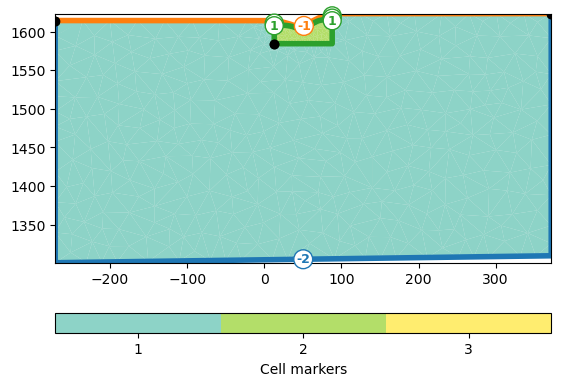

In [4]:
pg.show(mesh_with_interface,markers=True)

In [ ]:

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh_file=mesh_with_interface,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


14/05/25 - 22:40:46 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 22:40:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:40:46 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 22:40:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:40:46 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 22:40:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:40:46 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 22:40:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:40:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 22:40:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 22:40:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


14/05/25 - 22:40:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 22:40:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 22:40:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
14/05/25 - 22:41:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 22:41:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 22:41:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 74.88721014249437
dPhi: 0.9713608850624461
ERTphi_d: 186019.82999395602, ERTphi_m: 4576.243350100081, ERTphi_t: 2028.581073525861
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 5.070345444807227
dPhi: 0.932293572758827
ERTphi_d: 12594.738084901153, ERTphi_m: 1900.6541335944928, ERTphi_t: 2029.4065383881616
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.7520941835679171
dPhi: 0.6544428377434683
ERTphi_d: 4352.201951982706, ERTphi_m: 1658.1591752659658, ERTphi_t: 2040.4080967519815


In [ ]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

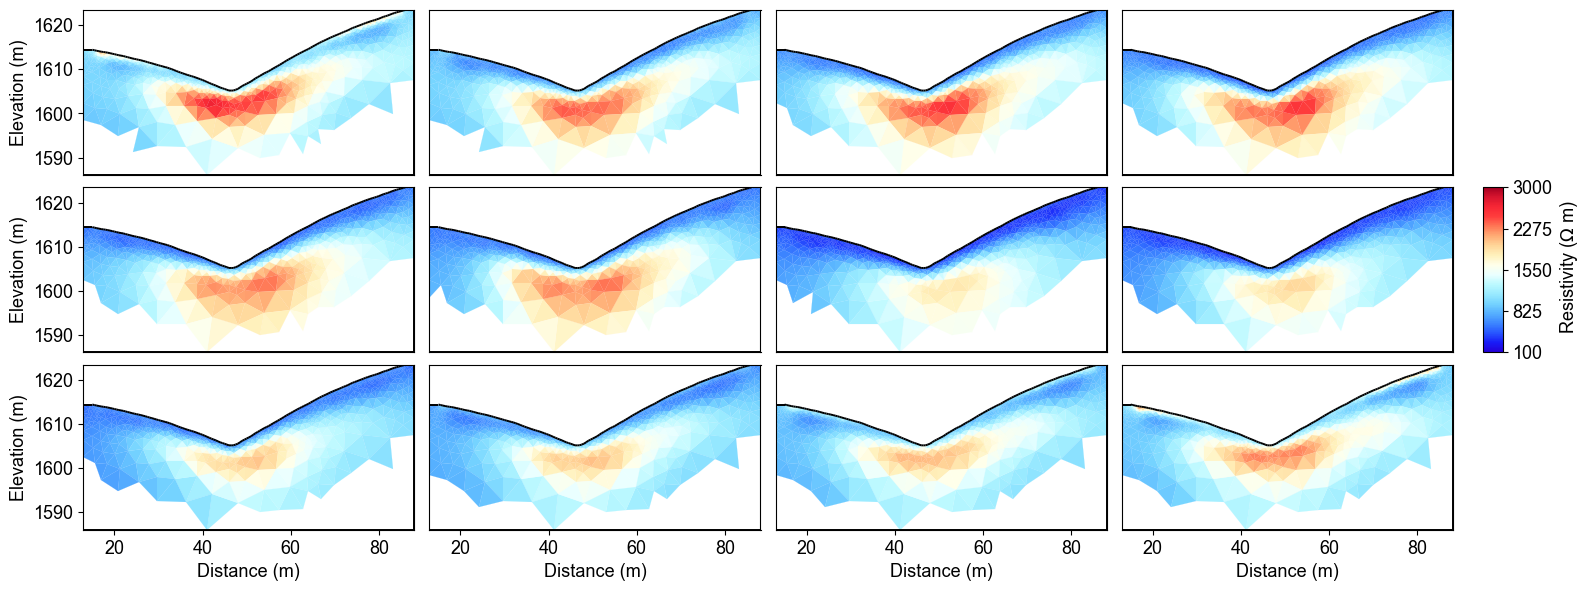

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/appres/timelapse_ert_with structure.tiff", dpi=300, bbox_inches='tight')